

1.- DESARROLLAR UN COLAB QUE APLIQUE PREPROCESAMIENTO, IDENTIFICANDO LA TECNICA RESPECTIVA.

A) DATA CLEANING
B) DATA NORMALIZACION
C) DATA REDUCCION


2.- APLICAR LA ETAPA DE EXPLORACIÓN

A) 2 COMANDO DIRECTO
B) 3 COMANDOS INDIRECTO
C) SE REQUIERE HACER UN ANALISIS GRAFICA CORRELACIONAL EN LAS COLUMNAS DE ALEXA DIRECTA, INDIRECTA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
# Cargando los datos a un DataFrame de Pandas
df = pd.read_excel('/content/EVALUACION SUMATIVA_M2A.xlsx', sheet_name=0)

In [ ]:
# Convierte un número en el formato de columna estilo Excel (A, B, ..., Z, AA, AB, ...)
# para lograr estandarizar los nombre de las columnas y ubicarlos de manera eficiente en el excel.
def num_to_excel_col(n):
    excel_col = ''
    while n > 0:
        n, remainder = divmod(n - 1, 26)
        excel_col = chr(65 + remainder) + excel_col
    return excel_col

In [ ]:
# Estandarizando de los nombre de las columnas para que estos no sea muy largos.
dict_datos = {}

columnas_aux = df.columns.to_list()

df.columns = (df.columns.str.title().str.replace(r'[^a-zA-Z]', '', regex=True).str[:8])
df.columns = [f'{num_to_excel_col(i+1)}_{col}' for i, col in enumerate(df.columns)]

for i, col in enumerate(df.columns):
  dict_datos[col] = columnas_aux[i]

print(f'Diccionario:\n{list(dict_datos.items())[: 3]}\n\n')
print(f'Columnas:\n{df.columns[:3]}')

nombres_columnas = df.columns.to_list()

Diccionario:
[('A_Estado', 'ESTADO'), ('B_NombresY', '1.- Nombres y Apellidos del encuestado (Adulto mayor)'), ('C_CdigoDel', '3.- Código del sujeto (ECU-IUTA-R-XXX)')]


Columnas:
Index(['A_Estado', 'B_NombresY', 'C_CdigoDel'], dtype='object')


<br><hr>
<center><b>EXPLORACIÓN DE DATOS</b></center>
<br>

In [ ]:
# 10 filas del DataFrame.
df.head(10)

,A_Estado,B_NombresY,C_CdigoDel,D_Edad,E_Profesio,F_Sexo,G_EstadoCi,H_Laterali,I_DficitSe,J_Enfermed,...,LI_TotalPCo,LJ_TotalWai,LK_Resultad,LL_TotalAR,LM_TotalBdi,LN_Puntuaci,LO_Puntuaci,LP_TotalAle,LQ_TotalAle,LR_FirmaCon
0,APTO-V1,Juliana Malá,ECU-ISTA-R-158,60,ama de casa,Mujer,Casado/a,Diestro,Ninguno,NaN,...,16.0,37.0,59.0,3.0,15.0,6,2,8,8,1
1,APTO-V1,Jose Antonio Inga Cordero,ECU-IUTA-R-152,60,agricultor,Hombre,No menciono,Diestro,Ninguno,NaN,...,16.0,37.0,70.0,6.0,6.0,2,1,3,4,1
2,APTO-V1,TOLEDO CAMPOVERDE GERMANIA ISABEL,ECU-ISTA-E-106,62,ama de casa,Mujer,Casado/a,Diestro,Ninguno,NaN,...,14.0,52.0,98.0,8.0,17.0,4,3,7,6,0
3,APTO-V1,TUZA NIEVES ROSA MARIA,ECU-ISTA-E-120,62,ama de casa,Mujer,Viudo/a,Diestro,Ninguno,NaN,...,16.0,42.0,90.0,-17.0,7.0,2,3,5,4,0
4,APTO-V1,Segundo Remigio Mora Mora,ECU-IUTA-R-071,65,agricultor,Hombre,Casado/a,Diestro,Visual,NaN,...,8.0,26.0,74.0,14.0,37.0,0,0,0,2,1
5,APTO-V1,Maria Suconota Cajamarca,ECU-IUTA-R-151,66,ama de casa,Hombre,No menciono,Diestro,Ninguno,NaN,...,16.0,35.0,57.0,17.0,16.0,0,0,0,2,1
6,APTO-V1,Gomez Coello Saida Ruth,ECU-ISTA-E-056,66,ama de casa,Mujer,Casado/a,Diestro,Ninguno,NaN,...,15.0,53.0,79.0,-4.0,1.0,4,1,5,6,0
7,APTO-V1,Maria Ofelia Peralta Bravo,ECU-IUTA-R-013,67,ama de casa,Mujer,Viudo/a,Diestro,Visual,Insomnio,...,12.0,24.0,61.0,-18.0,17.0,1,0,1,4,1
8,APTO-V1,Bertha Lugarda Lopez Torres,ECU-IUTA-R-031,67,ama de casa,Mujer,Viudo/a,Diestro,Auditivo,Estres,...,11.0,27.0,73.0,7.0,29.0,2,1,3,4,1
9,APTO-V1,TENESACA LOJANO LUISA CELESTINA,ECU-ISTA-E-097,67,ama de casa,Mujer,Casado/a,Diestro,Ninguno,NaN,...,15.0,34.0,80.0,-14.0,3.0,0,0,0,2,0


In [ ]:
# 10 filas aleatoriamente.
df.sample(10)

,A_Estado,B_NombresY,C_CdigoDel,D_Edad,E_Profesio,F_Sexo,G_EstadoCi,H_Laterali,I_DficitSe,J_Enfermed,...,LI_TotalPCo,LJ_TotalWai,LK_Resultad,LL_TotalAR,LM_TotalBdi,LN_Puntuaci,LO_Puntuaci,LP_TotalAle,LQ_TotalAle,LR_FirmaCon
5,APTO-V1,Maria Suconota Cajamarca,ECU-IUTA-R-151,66,ama de casa,Hombre,No menciono,Diestro,Ninguno,NaN,...,16.0,35.0,57.0,17.0,16.0,0,0,0,2,1
22,APTO-V1,HERRERA ESCANDON CLARA NOHEMI,ECU-ISTA-E-091,70,ama de casa,Mujer,Viudo/a,Diestro,Ninguno,NaN,...,14.0,46.0,97.0,-5.0,3.0,2,3,5,4,0
60,APTO-V1,Rosa Matilde Sanchez Quiroga,ECU-IUTA-R-132,80,ama de casa,Mujer,Viudo/a,Zurdo,Ninguno,NaN,...,9.0,33.0,55.0,11.0,19.0,2,1,3,4,1
19,APTO-V1,Maria Auxilio Pineda Yuquilima,ECU-IUTA-R-003,70,ama de casa,Hombre,Casado/a,Diestro,Ninguno,NaN,...,16.0,43.0,63.0,20.0,53.0,0,1,1,2,1
37,APTO-V1,Laura María Barbecho Asmal,ECU-IUTA-R-048,75,ama de casa,Mujer,Viudo/a,Zurdo,Ninguno,NaN,...,10.0,23.0,53.0,18.0,17.0,0,0,0,2,1
3,APTO-V1,TUZA NIEVES ROSA MARIA,ECU-ISTA-E-120,62,ama de casa,Mujer,Viudo/a,Diestro,Ninguno,NaN,...,16.0,42.0,90.0,-17.0,7.0,2,3,5,4,0
70,APTO-V1,Manuel Marcelino Vivar Chitocapa,ECU-IUTA-R-165,87,agricultor,Hombre,Viudo/a,Diestro,Ninguno,NaN,...,13.0,27.0,48.0,-3.0,22.0,2,1,3,4,1
27,APTO-V1,Zoila Emermelinda Yanzaguano Velez,ECU-IUTA-R-166,72,ama de casa,Mujer,Divorciado/a,Diestro,Visual,NaN,...,15.0,31.0,69.0,-11.0,0.0,2,2,4,4,1
12,APTO-V1,Maria Emilia Pulgarin,ECU-IUTA-R-025,68,ama de casa,Mujer,Casado/a,Diestro,Visual,NaN,...,12.0,46.0,71.0,-10.0,18.0,2,0,2,4,1
8,APTO-V1,Bertha Lugarda Lopez Torres,ECU-IUTA-R-031,67,ama de casa,Mujer,Viudo/a,Diestro,Auditivo,Estres,...,11.0,27.0,73.0,7.0,29.0,2,1,3,4,1


In [ ]:
# Resumen sobre el DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Columns: 330 entries, A_Estado to LR_FirmaCon
dtypes: float64(294), int64(14), object(22)
memory usage: 185.8+ KB


In [ ]:
# Número de filas y columnas.
num_filas_df, num_columas_df = df.shape
print(f'---- DF ----\nFilas: {num_filas_df} | Columnas: {num_columas_df}')

---- DF ----
Filas: 72 | Columnas: 330


In [ ]:
# Verificando el tipo de dato de cada columna.
df.dtypes

,0
A_Estado,object
B_NombresY,object
C_CdigoDel,object
D_Edad,int64
E_Profesio,object
...,...
LN_Puntuaci,int64
LO_Puntuaci,int64
LP_TotalAle,int64
LQ_TotalAle,int64


In [ ]:
# Obteniendo las columnas que tienen valores nulos > 0.
def get_info_nulos():
  info_nulos = df.isnull().sum()
  return info_nulos[info_nulos > 0]


get_info_nulos()

,0
J_Enfermed,68
K_Escribir,68
L_Escribir,57
M_Medicaci,44
N_Observac,33
...,...
LI_TotalPCo,1
LJ_TotalWai,1
LK_Resultad,1
LL_TotalAR,1


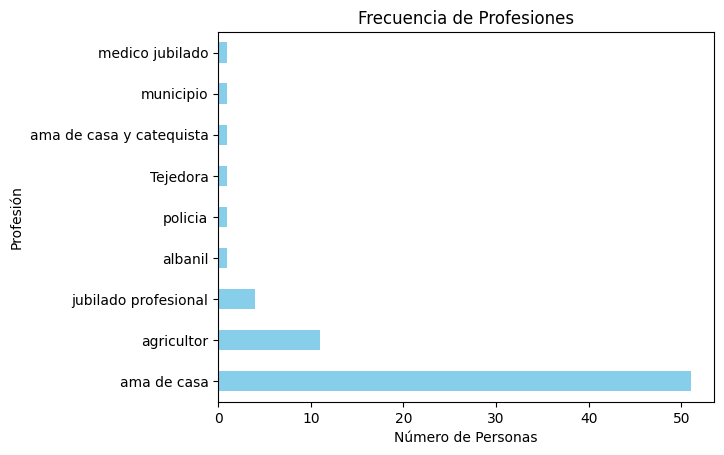

In [ ]:
col_name_prof = nombres_columnas[columnas_aux.index('2.- profesion')]

frecuencias = df[col_name_prof].value_counts()

frecuencias.plot(kind='barh', color='skyblue')

plt.title('Frecuencia de Profesiones')
plt.xlabel('Número de Personas')
plt.ylabel('Profesión')

# Mostrar gráfico
plt.show()

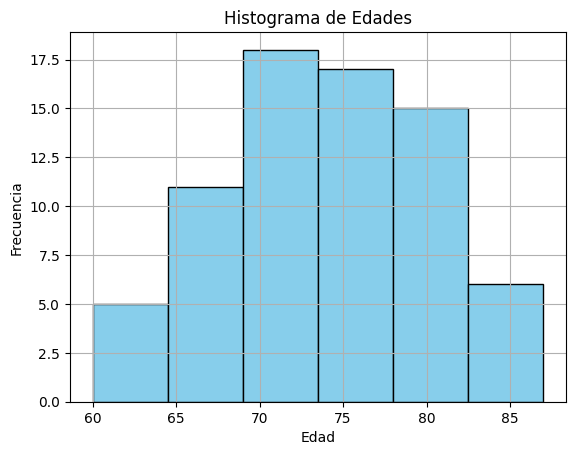

In [ ]:
df[nombres_columnas[columnas_aux.index('EDAD')]].astype(int).hist(bins=6, color='skyblue', edgecolor='black')

# Títulos y etiquetas
plt.title('Histograma de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Mostrar gráfico
plt.show()

<br><hr>
<center><b>DATA CLEANING</b></center>
<br>

In [ ]:
# Filtrado de columnas tipo String con valores nulos para su verificación en Excel.
replace_str_cols = []

for i in df.columns:
  nulos = df[i].isnull().sum()
  if df[i].dtype == 'object' and nulos > 0:
    replace_str_cols.append((i, nulos))

replace_str_cols

[('J_Enfermed', 68),
 ('K_Escribir', 68),
 ('L_Escribir', 57),
 ('M_Medicaci', 44),
 ('N_Observac', 33),
 ('CI_QuPrueba', 1),
 ('CJ_QuPrueba', 1),
 ('CV_AadirasA', 1),
 ('IT_AEMeSien', 1),
 ('KR_CambiosE', 1),
 ('KT_CambiosE', 2),
 ('KY_Clasific', 2),
 ('LA_AoDeEstu', 1)]

In [ ]:
# Una vez que se comprueba que efectivamente son de tipo String se procede a reemplazar.
for i in replace_str_cols:
  df[i[0]] = df[i[0]].fillna('Desconocido')

get_info_nulos()

,0
P_Ct,1
Q_Ct,1
R_Ct,1
S_Ct,1
T_Ct,1
...,...
LI_TotalPCo,1
LJ_TotalWai,1
LK_Resultad,1
LL_TotalAR,1


In [ ]:
# Reemplazando las columnas restantes que corresponden a valores numéricos por cero.
for i in df.columns:
  if df[i].isnull().sum() > 0:
    df[i] = df[i].fillna(0)

get_info_nulos()

,0


<br><hr>
<center><b>DATA TRANSFORMATION</b></center>
<br>

In [ ]:
# Verificamos las columnas que deben ser de tipo entero pero pandas los transforma en flotantes:
cols_a_int = []
for col in df.select_dtypes(include=['float']).columns:
    if (df[col] % 1 == 0).all():
        cols_a_int.append(col)

if len(cols_a_int) > 0:
  print(f'Total columnas: {len(cols_a_int)}\nEjm: {cols_a_int[0]}: {df[cols_a_int[0]].dtype}.')


Total columnas: 287
Ejm: P_Ct: float64.


In [ ]:
# Una vez verificado en el archivo excel, se procede a cambiar el tipo de dato a entero:
for col in cols_a_int:
  df[col] = df[col].astype('Int64')

In [ ]:
# Obteniendo la media de las edades:
media_edades = round(df[nombres_columnas[columnas_aux.index('EDAD')]].mean())
print(f'Promedio de edades: {media_edades} años.')

Promedio de edades: 74 años.


In [ ]:
# Obteniendo el genero(sexo) de las personas mayormente encuestadas.
moda_sexo = df[nombres_columnas[columnas_aux.index('6.- Sexo')]].mode()[0]
print(f'Moda del sexo: {moda_sexo}.')

Moda del sexo: Mujer.


In [ ]:
# Obteniendo la mediana de los resultados de la prueba de Letras y números.
mediana_pln = df[nombres_columnas[columnas_aux.index('RESULTADO FINAL LETRAS Y NUMEROS')]].median()
print(f'Mediana resultado Letras y números: {mediana_pln}')

Mediana resultado Letras y números: 4.5


In [ ]:
# Máximo y mínimo resultado de la prueba A-CER.
max_acer = df[nombres_columnas[columnas_aux.index('RESULTADO A-CER')]].max()
min_acer = df[nombres_columnas[columnas_aux.index('RESULTADO A-CER')]].min()
print(f'A-CER Resultado: Máximo = {max_acer}, mínimo = {min_acer}')

A-CER Resultado: Máximo = 101, mínimo = 0


<br><hr>
<center><b>DATA REDUCTION</b></center>
<br>

In [ ]:
# Eligiendo una muestra representativa de los datos:

N = num_filas_df  # Tamaño de la población
Z = 1.96  # Valor Z para un 95% de confianza
p = 0.5  # Proporción estimada
E = 0.05  # Margen de error deseado

# Fórmula para calcular el tamaño de la muestra con población
n = (N * Z**2 * p * (1 - p)) / ((E**2 * (N - 1)) + (Z**2 * p * (1 - p)))
n = math.ceil(n)

muestra_df = df.sample(n=n, random_state=42)
muestra_df.head()

,A_Estado,B_NombresY,C_CdigoDel,D_Edad,E_Profesio,F_Sexo,G_EstadoCi,H_Laterali,I_DficitSe,J_Enfermed,...,LI_TotalPCo,LJ_TotalWai,LK_Resultad,LL_TotalAR,LM_TotalBdi,LN_Puntuaci,LO_Puntuaci,LP_TotalAle,LQ_TotalAle,LR_FirmaCon
4,APTO-V1,Segundo Remigio Mora Mora,ECU-IUTA-R-071,65,agricultor,Hombre,Casado/a,Diestro,Visual,Desconocido,...,8,26,74,14,37,0,0,0,2,1
62,APTO-V1,GONZALES LOYOLA JULIO FLORENCIO,ECU-ISTA-E-105,81,jubilado profesional,Hombre,Casado/a,Diestro,Ninguno,Desconocido,...,14,55,89,-11,7,0,0,0,2,0
18,APTO-V1,María Isabel Quishpe Lóoez,ECU-IUTA-R-155,70,ama de casa,Mujer,Divorciado/a,Diestro,Visual,Desconocido,...,8,22,50,15,53,1,1,2,4,1
0,APTO-V1,Juliana Malá,ECU-ISTA-R-158,60,ama de casa,Mujer,Casado/a,Diestro,Ninguno,Desconocido,...,16,37,59,3,15,6,2,8,8,1
28,APTO-V1,Jose Luis Data,ECU-IUTA-R-156,72,agricultor,Hombre,No menciono,Diestro,Ninguno,Desconocido,...,14,31,58,6,19,3,1,4,6,1


In [ ]:
# Exportando la data en un nuevo archivo excel:
df_dict = pd.DataFrame(list(dict_datos.items()), columns=['Término', 'Descripción'])

with pd.ExcelWriter('/content/datos_limpios.xlsx') as writer:
    df.to_excel(writer, sheet_name='DatosLimpios', index=False)
    muestra_df.to_excel(writer, sheet_name='MuestraRepresentativa', index=False)
    df_dict.to_excel(writer, sheet_name='DiccionarioDatos', index=False)

print("Archivo Excel exportado exitosamente.")

Archivo Excel exportado exitosamente.


<br><hr>
<center><b>GRAFICA CORRELACIONAL EN LAS COLUMNAS DE ALEXA DIRECTA, INDIRECTA</b></center>
<br>

Correlación entre Alexa directa e indirecta: 0.4710599517163339



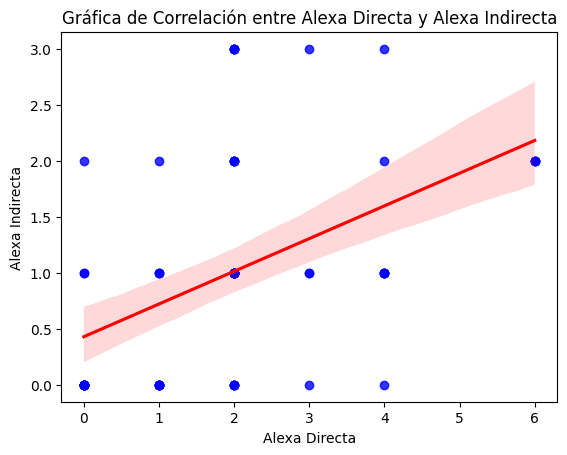

In [ ]:
col_name_alexadir = nombres_columnas[columnas_aux.index('PUNTUACION ALEXA DIRECTA: 0a2')]
col_name_alexaind = nombres_columnas[columnas_aux.index('PUNTUACION ALEXA INDIRECTA')]

# Calcular la correlación entre las dos variables
correlacion = df[col_name_alexadir].corr(df[col_name_alexaind])
print(f'Correlación entre Alexa directa e indirecta: {correlacion}\n')

# Crear el gráfico de dispersión
sns.regplot(data=df, x=col_name_alexadir, y=col_name_alexaind, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.title('Gráfica de Correlación entre Alexa Directa y Alexa Indirecta')
plt.xlabel('Alexa Directa')
plt.ylabel('Alexa Indirecta')

plt.show()